# Small Multiples
----

Created by Cristian E. Nuno

Date: August 14, 2019

![example](visuals/small_multiples_example.png)

## Overview

Small multiples is a visualization technique that partions your data such that you're visualizing one piece of it at a time. These pieces are stored as series of individual plots (i.e. subplots) that share the same x and y-axes. 

Having each subplot on the same scale makes it easier for the reader to compare one subplot to the next without having to mentally account for different scales.

## Goal

For you to be able to create small multiples in python using [`matplotlib`](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html).

### Inspiration

This tutorial was inspired by Yan Holtz's [_Small Multiples for Line Charts_](https://python-graph-gallery.com/125-small-multiples-for-line-chart/) tutorial. 


In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Here, each record in `df` represents the average number of commits each team member has, per hour,  over the course of one hackathon.

In [2]:
# import necessary data
df = pd.read_csv("write_data/commits_per_hour_long.csv")
df["num_repos"] = 42
df.head()

,hour,variable,value,num_repos
0,1,sam,4.724404,42
1,2,sam,6.851426,42
2,3,sam,5.314597,42
3,4,sam,3.151479,42
4,5,sam,4.712608,42


In [3]:
df.shape

(90, 4)

### Reshaping Data from Long to Wide

This is an example of reshaping from wide to long:
![wide to long](visuals/wide_to_long.png)

This is an example of reshaping from long to wide:
![long to wide](visuals/long_to_wide.png)


When making visualizations, knowing which shape your data needs to be in is half the battle. In this case, we want to transform `df` such that is reshaped from long to wide.

*Images created by RStudio. Source: https://github.com/rstudio/cheatsheets/blob/master/data-import.pdf*

Inside of `df.pivot`, we interpret the parameters within the method like this:

* `index`: the unique values within the `hour` column will be the new records
* `columns`: for each unique value in the `variable` column, create new columns
* `values`: assign each observation in the `value` column to the appropriate `index` and `<person>` column. Note that this is the parameter that can take a list of column names if you have more than one observation worth keeping. However, it isn't very practical so typically only one string will be supplied into `value`.

*Note: we use `.reset_index()` here to transform `hour` from an index to a column.*

In [4]:
df_wide = df.pivot(index="hour", 
                   columns="variable", 
                   values="value").reset_index()
df_wide.head()

variable,hour,addison,alex,blake,cameron,dakota,jaime,jordan,kieran,sam
0,1,2.0,14.630202,10.0,8.574404,5.435655,4.118144,13.348835,9.929550,4.724404
1,2,2.0,14.590736,9.0,8.071311,4.745033,3.272644,10.908124,8.133082,6.851426
2,3,2.0,14.536613,8.0,17.197868,3.522064,8.066751,14.238251,8.960635,5.314597
3,4,2.0,16.951238,7.0,19.704569,5.117460,8.366856,14.921168,11.315774,3.151479
4,5,2.0,15.620080,6.0,18.473927,5.052497,1.130013,7.019698,11.000944,4.712608


Now we'll do some styling before any creation of the figure and subplots. 

See [here for more information on style sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) and [here for information on color maps (i.e. color palettes)](https://matplotlib.org/users/colormaps.html).

In [5]:
# enforce a specific plot style sheet
plt.style.use("dark_background")

# create a color palette
palette = plt.get_cmap("Paired")

#### Creating Small Multiples

##### `fig` and `axs`

As seen [in the `matplotlib` documentation](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-two-directions), we want to create a plot figure that contains a 3X3 grid. Each of the 9 subplots will be accessible by indexing the `axs` object. 

##### Indexing `axs`

To access the subplot in the upper left corner, index `axs` by typing `axs[0, 0]`. You read that as "the subplot in the first row in the first column". 

To access the subplot in the bottom right corner, you type `axs[2, 2]`. You read that as "the subplot in the third row in the third column".

While it is possible to index a particular subplot via `axs[row][col]`, [`numpy` documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html) discourages this behavior:

> So note that `x[0, 2]` = `x[0][2]` though the second case is more inefficient as a new temporary array is created after the first index that is subsequently indexed by 2.

*Always helpful to remember that [Python using zero based indexing](http://python-history.blogspot.com/2013/10/why-python-uses-0-based-indexing.html).*

To avoid manually typing each subplot, we'll access each subplot by using two `for` loops: one for `row` and one for `column`. Additionally, we'll add a value of `1` to the `counter` object after each subplot so that we can highlight one teammate in color.

##### Adding things to the `fig`

Only after the subplots are drawn do we worry about adding elements to `fig`. Here, we'll be creating a title that will be placed in the middle of the figure at the very top. We'll also be adding labels to the x and y-axis. 

Finally, we'll save the figure as a `PNG` file.


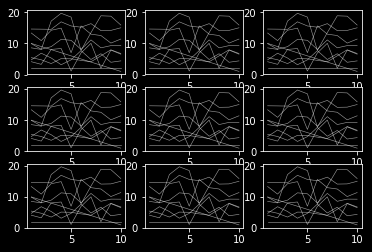

In [7]:
# create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3)

# counter will store the feature index to use when highlighting a particular teammate in each subplot
counter = 0

# begin the nested for loop to access each individual subplot within the 3x3 grid
# note: we are subsetting each subplot via axs[row, col]
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        # plot every feature in each subplot as a white line
        for feature in df_wide.drop("hour", axis=1).columns:
            axs[row, col].plot(df_wide["hour"],
                           df_wide[feature],
                           marker="",
                           color="white", 
                           linewidth=0.6,
                           alpha=0.6)

In [ ]:
# create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3)

# counter will store the feature index to use when highlighting a particular teammate in each subplot
counter = 0

# begin the nested for loop to access each individual subplot within the 3x3 grid
# note: we are subsetting each subplot via axs[row, col]
for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        # plot every feature in each subplot as a white line
        for feature in df_wide.drop("hour", axis=1).columns:
            axs[row, col].plot(df_wide["hour"],
                           df_wide[feature],
                           marker="",
                           color="white", 
                           linewidth=0.6,
                           alpha=0.3)
        # for each subplot, plot only one non-"hour" feature - via counter - in color
        # note: this where we'll input counter directly inside of palette()
        axs[row, col].plot(df_wide["hour"],
                           df_wide.drop("hour", axis=1).iloc[:, counter],
                           marker="",
                           color=palette(counter), 
                           linewidth=2.4,
                           alpha=0.9)
        # set xlim and ylim for each subplot
        axs[row, col].set_xlim(0,10)
        axs[row, col].set_ylim(-2,22)
        
        # remove x-axis tick marks from the first two rows of subplots
        if row in [0, 1]:
            axs[row, col].tick_params(labelbottom=False)
        # remove the y-axis tick marks from the second and third columns of subplots
        if col in [1, 2]:
            axs[row, col].tick_params(labelleft=False)          

        # assign each subplot a title based on the one non-"hour" feature that was highlighted in color
        axs[row, col].set_title(df_wide.drop("hour", axis=1).iloc[:, counter].name, 
                                loc="left", 
                                fontsize=12, 
                                fontweight=0, 
                                color=palette(counter))
        
        # now that we're done with this subplot, add one to counter so the next teammate is highlighted
        counter += 1
            
# assign an overall title
fig.suptitle("Average number of commits over time by each team member", 
             fontsize=13, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
 
# label axes
fig.text(0.5, 0.01, "Time (in number of hours since start of hackathon)", ha="center", va="center")
fig.text(0.01, 0.5, "Number of commits", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout()

# export figure as PNG file
fig.savefig("visuals/class_small_multiples_example.png",
            dpi=200,
            bbox_inches="tight")